In [240]:
#*************************************************************************
# Name: Jonah Zembower
# Date: 11/25/24
# Project: Looking at the Life Expectancy of different countries
# Life expectancy dataset on Kaggle from the World Health Organization
#*************************************************************************

# Importing Packages and Data

In [241]:
# Importing necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [242]:
# Reading in the dataset for windows
# data = pd.read_csv("C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Semester Classwork\\Fall 2024 Semester SHU\\Probability and Statistics II\\Projects\\Life Expectancy Data.csv")
# data.head()

In [243]:
# Read in the data
data = pd.read_csv('/Users/jonahzembower/Library/CloudStorage/OneDrive-SetonHillUniversity/Semester Classwork/Fall 2024 Semester SHU/Probability and Statistics II/Projects/Life Expectancy Data.csv')

data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [244]:
# Look at the 2015 year alone
data_2015 = data[data['Year']== 2015]

# Save the csv for the 2015 data
data_2015.to_csv('2015_data.csv')

In [245]:
# Show the first 5 rows of the 2015 data
data_2015.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335.0,66,NaN,0.000000,64.0,118,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.000000,99.0,0,...,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9


# Exploratory Data Analysis

In [246]:
# Features that we are going to look at
y = ['Life expectancy ']
x = data_2015.columns.drop(y)
x

Index(['Country', 'Year', 'Status', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

First look into data cleaning to ensure the variables have realistic data.

In [247]:
# Remove any values that are 0
data_cleaned = data_2015[data_2015 !=0]

data_cleaned

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
16,Albania,2015,Developing,77.8,74.0,NaN,4.60,364.975229,99.0,NaN,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
32,Algeria,2015,Developing,75.6,19.0,21.0,NaN,NaN,95.0,63.0,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335.0,66.0,NaN,NaN,64.0,118.0,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13.0,NaN,NaN,NaN,99.0,NaN,...,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,Venezuela (Bolivarian Republic of),2015,Developing,74.1,157.0,9.0,NaN,NaN,87.0,NaN,...,87.0,NaN,87.0,0.1,NaN,NaN,1.6,1.5,0.769,14.3
2874,Viet Nam,2015,Developing,76.0,127.0,28.0,NaN,NaN,97.0,256.0,...,97.0,NaN,97.0,0.1,NaN,NaN,14.2,14.5,0.678,12.6
2890,Yemen,2015,Developing,65.7,224.0,37.0,NaN,NaN,69.0,468.0,...,63.0,NaN,69.0,0.1,NaN,NaN,13.6,13.4,0.499,9.0
2906,Zambia,2015,Developing,61.8,33.0,27.0,NaN,NaN,9.0,9.0,...,9.0,NaN,9.0,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5


This clearly has little significance to remove all NaN values since it only leaves us with one country that has all features. Utilize the cleaned dataset to begin some visualizations of the data. 

In [248]:
# Look into removing the NaN values
data_nan = data_cleaned.isnull().sum()
data_nan 

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                       59
Alcohol                            177
percentage expenditure             181
Hepatitis B                          9
Measles                             62
 BMI                                 2
under-five deaths                   54
Polio                                0
Total expenditure                  181
Diphtheria                           0
 HIV/AIDS                            0
GDP                                 29
Population                          41
 thinness  1-19 years                2
 thinness 5-9 years                  2
Income composition of resources     10
Schooling                           10
dtype: int64

In [249]:
# Remove the following variables of alcohol, percentage expenditure, infant deaths, and total expenditure
data_cleaned = data_cleaned.drop(['Alcohol', 'percentage expenditure', 'infant deaths', 'Total expenditure','Year',' BMI ','Adult Mortality'], axis = 1)
data_cleaned.dtypes

Country                             object
Status                              object
Life expectancy                    float64
Hepatitis B                        float64
Measles                            float64
under-five deaths                  float64
Polio                              float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

We see all the datatypes are useable and the same except for status, which we will change. We don't have to worry about country because that is the index of our dataset. 

In [250]:
# Make country the index of the dataset
data_cleaned = data_cleaned.set_index('Country')

In [251]:
data_cleaned

,Status,Life expectancy,Hepatitis B,Measles,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,
Afghanistan,Developing,65.0,65.0,1154.0,83.0,6.0,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
Albania,Developing,77.8,99.0,NaN,NaN,99.0,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
Algeria,Developing,75.6,95.0,63.0,24.0,95.0,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
Angola,Developing,52.4,64.0,118.0,98.0,7.0,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
Antigua and Barbuda,Developing,76.4,99.0,NaN,NaN,86.0,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),Developing,74.1,87.0,NaN,10.0,87.0,87.0,0.1,NaN,NaN,1.6,1.5,0.769,14.3
Viet Nam,Developing,76.0,97.0,256.0,35.0,97.0,97.0,0.1,NaN,NaN,14.2,14.5,0.678,12.6
Yemen,Developing,65.7,69.0,468.0,47.0,63.0,69.0,0.1,NaN,NaN,13.6,13.4,0.499,9.0


In [252]:
# Change the developing and developed countries to 0 and 1
data_cleaned['Is_Developed'] = data_cleaned['Status'].replace(['Developing','Developed'], [0,1])
data_cleaned


,Status,Life expectancy,Hepatitis B,Measles,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Is_Developed
Country,,,,,,,,,,,,,,,
Afghanistan,Developing,65.0,65.0,1154.0,83.0,6.0,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0
Albania,Developing,77.8,99.0,NaN,NaN,99.0,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,0
Algeria,Developing,75.6,95.0,63.0,24.0,95.0,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,0
Angola,Developing,52.4,64.0,118.0,98.0,7.0,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,0
Antigua and Barbuda,Developing,76.4,99.0,NaN,NaN,86.0,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),Developing,74.1,87.0,NaN,10.0,87.0,87.0,0.1,NaN,NaN,1.6,1.5,0.769,14.3,0
Viet Nam,Developing,76.0,97.0,256.0,35.0,97.0,97.0,0.1,NaN,NaN,14.2,14.5,0.678,12.6,0
Yemen,Developing,65.7,69.0,468.0,47.0,63.0,69.0,0.1,NaN,NaN,13.6,13.4,0.499,9.0,0


In [253]:
data_cleaned = data_cleaned.drop(['Status'], axis = 1)

In [254]:
data_cleaned

,Life expectancy,Hepatitis B,Measles,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Is_Developed
Country,,,,,,,,,,,,,,
Afghanistan,65.0,65.0,1154.0,83.0,6.0,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0
Albania,77.8,99.0,NaN,NaN,99.0,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,0
Algeria,75.6,95.0,63.0,24.0,95.0,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,0
Angola,52.4,64.0,118.0,98.0,7.0,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,0
Antigua and Barbuda,76.4,99.0,NaN,NaN,86.0,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),74.1,87.0,NaN,10.0,87.0,87.0,0.1,NaN,NaN,1.6,1.5,0.769,14.3,0
Viet Nam,76.0,97.0,256.0,35.0,97.0,97.0,0.1,NaN,NaN,14.2,14.5,0.678,12.6,0
Yemen,65.7,69.0,468.0,47.0,63.0,69.0,0.1,NaN,NaN,13.6,13.4,0.499,9.0,0


Text(0.5, 1.0, 'Correlation Heatmap')

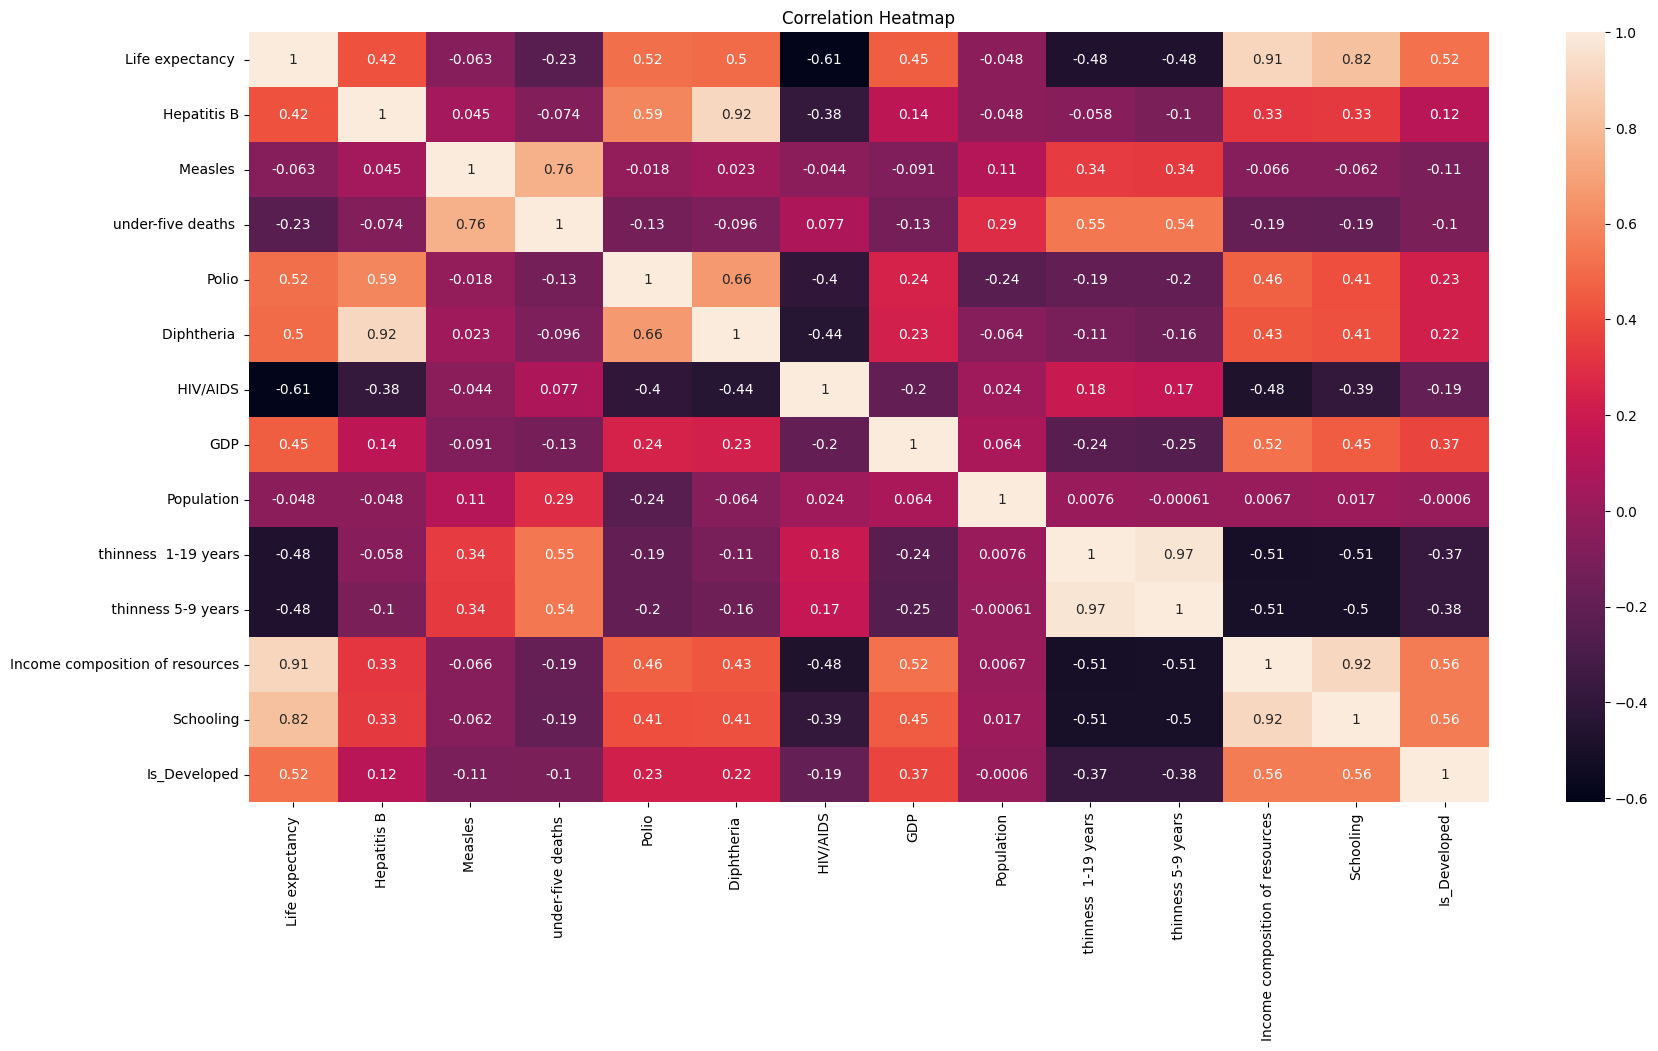

In [255]:
# Begin to visualize the correlations of the data using a heatmap
plt.figure(figsize=(20,10))
sns.heatmap(data_cleaned.corr(), annot=True)
plt.title('Correlation Heatmap')

Showing the individual correlation values both positive and negative. Positive meaning as one increases so does the other and negative meaning as one increases the other has an opposite effect.


In [256]:
# Showcase the variables that have a positive correlation of 0.75 or higher for the entire dataset
data_cleaned.corr()[data_cleaned.corr() >= 0.75]

,Life expectancy,Hepatitis B,Measles,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Is_Developed
Life expectancy,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.907364,0.818159,NaN
Hepatitis B,NaN,1.00000,NaN,NaN,NaN,0.91522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Measles,NaN,NaN,1.000000,0.757153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
under-five deaths,NaN,NaN,0.757153,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Polio,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Diphtheria,NaN,0.91522,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HIV/AIDS,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GDP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Population,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
thinness 1-19 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.973195,NaN,NaN,NaN


In [257]:
# Showcase the variables that have a negative correlation of -0.75 or lower
data_cleaned.corr()[data_cleaned.corr() <= -0.75]


,Life expectancy,Hepatitis B,Measles,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Is_Developed
Life expectancy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hepatitis B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Measles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
under-five deaths,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Polio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Diphtheria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HIV/AIDS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GDP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Population,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
thinness 1-19 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This notes all the heavier correlations that can be seen between the variables and removes the others from view. We can see that there are some positive correlations that are large, but no negative correlations that are large for the data.

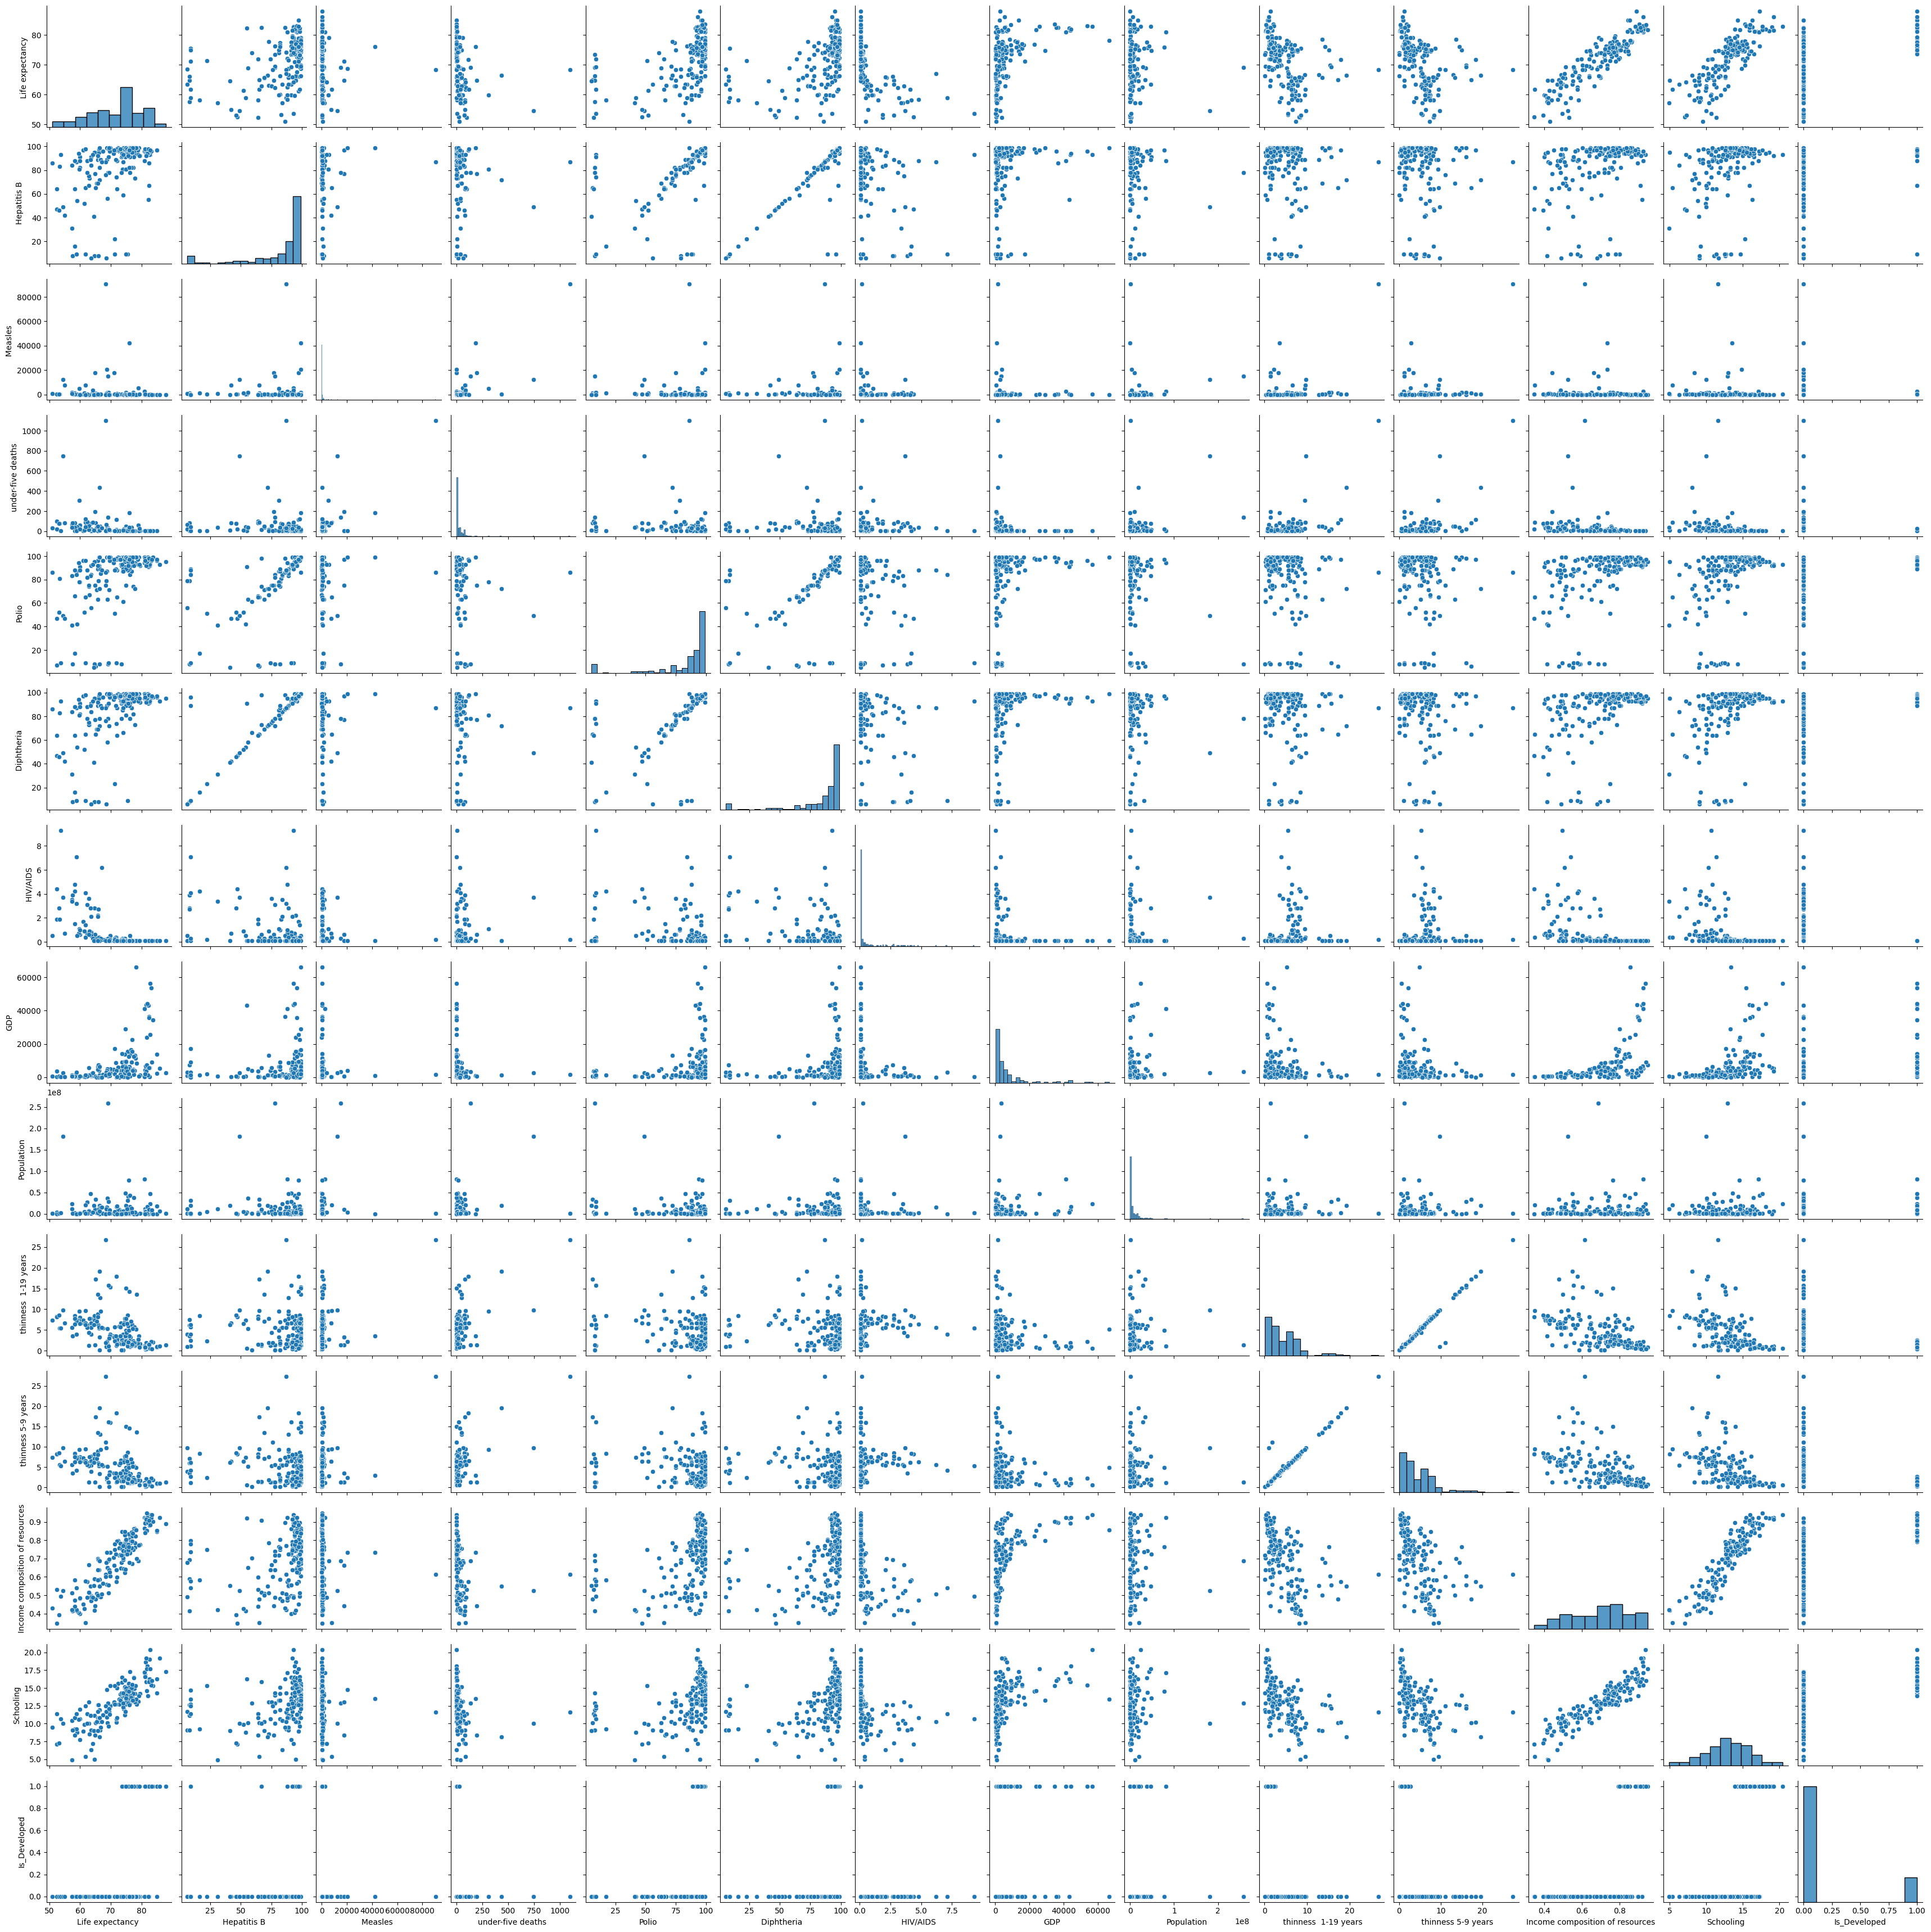

In [258]:
# Begin to visualize the data using a pairplot
sns.pairplot(data_cleaned)

This pairplot is showing the relationship between each of the variables in a scatter plot. Similar to what we would see from the correlations with positive indicating an increase in one would increase the other, while negative correlation would mean that the variables would have an opposite relationship. This means an increase in one would thus be a decrease in the other. 

Text(0.5, 1.0, 'Life Expectancy Boxplot')

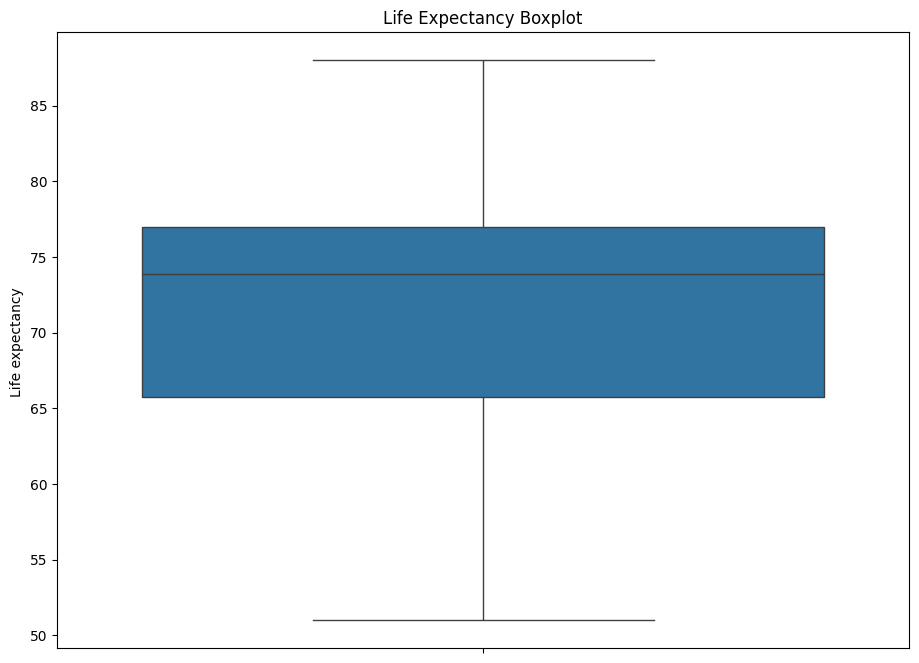

In [259]:
# showcase a boxplot of the data
plt.figure(figsize=(11,8))
sns.boxplot(data=data_cleaned['Life expectancy '])
plt.title('Life Expectancy Boxplot')

Box plot of the life expectancy distribution.

Text(0.5, 1.0, 'Life Expectancy Histogram')

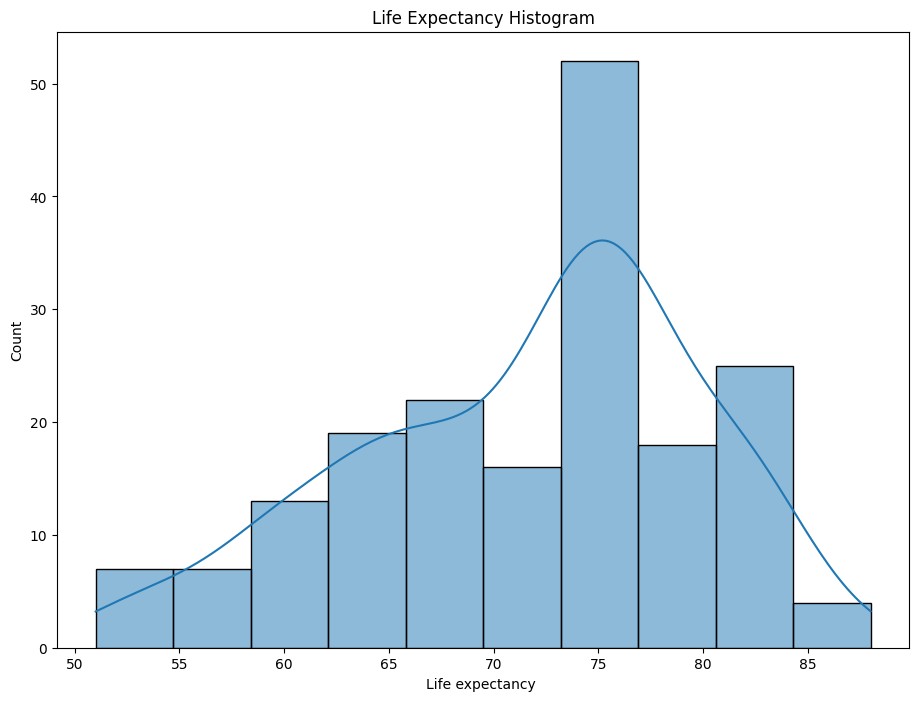

In [260]:
# Showcase a histogram of the data
plt.figure(figsize=(11,8))
sns.histplot(data_cleaned['Life expectancy '], kde=True)
plt.title('Life Expectancy Histogram')


In [261]:
data_cleaned

,Life expectancy,Hepatitis B,Measles,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Is_Developed
Country,,,,,,,,,,,,,,
Afghanistan,65.0,65.0,1154.0,83.0,6.0,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0
Albania,77.8,99.0,NaN,NaN,99.0,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,0
Algeria,75.6,95.0,63.0,24.0,95.0,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,0
Angola,52.4,64.0,118.0,98.0,7.0,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,0
Antigua and Barbuda,76.4,99.0,NaN,NaN,86.0,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),74.1,87.0,NaN,10.0,87.0,87.0,0.1,NaN,NaN,1.6,1.5,0.769,14.3,0
Viet Nam,76.0,97.0,256.0,35.0,97.0,97.0,0.1,NaN,NaN,14.2,14.5,0.678,12.6,0
Yemen,65.7,69.0,468.0,47.0,63.0,69.0,0.1,NaN,NaN,13.6,13.4,0.499,9.0,0


A histogram of the life-expectancy distribution. We can see the distribution appears to be slightly skewed. We should check for skewness.

# Multiple Linear Regression

HO: We assume that no variables can aid in the prediction of life expectancy for a given country.

HA: There are some variables that can predict life expectancy for a given country.

Looking at the multiple linear regression using technqiues to see if any of the variables have a statistically significant relationship to the response variable of life expectancy for the given countries. 

In [262]:
# check for the skewness of the data
data_cleaned.skew()

# make this into a table
skew_table = pd.DataFrame(data_cleaned.skew(), columns=['Skewness'])
skew_table

,Skewness
Life expectancy,-0.494597
Hepatitis B,-2.067015
Measles,7.398626
under-five deaths,6.323516
Polio,-2.188802
Diphtheria,-2.349014
HIV/AIDS,3.389411
GDP,2.867168
Population,6.168962
thinness 1-19 years,1.954519


The general skewness showcases very high positive and negative values. When we look at skewness, we look for values that are between -0.5 and 0.5 as low skewness and values that are less than -1 and greater than 1 as high skewness. 

The highest skewness variables are Hepatitis B, Measles, under-five deaths, Polio, Diphtheria, HIV/AIDS, GDP, Population, thinness 1-19 years, thinness 5-9 years, and Is_Developed.

The low skewness variables are Life expectancy, income composition of resources, and schooling. 

Overall, this data appears to be very skewed which may affect the results of life expectancy potentially. 

Now, let's move onto performing our mutliple linear regression. First, we will look at all variables at once as predictors. 

In [263]:
# Assessing multicollinearity of the independent variables
# Importing packages for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Remove all nans from the dataset
data_vif = data_cleaned.dropna()

# Add a constant column to the dataset for VIF calculation
X = add_constant(data_vif.drop(columns=['Life expectancy ']))

# Compute VIF for each feature
vif_data = pd.DataFrame({"Feature": X.columns, 
                         "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]})

print(vif_data)


                            Feature        VIF
0                             const  76.120879
1                       Hepatitis B   8.231820
2                          Measles    3.240833
3                under-five deaths    5.071519
4                             Polio   2.818256
5                       Diphtheria    9.757366
6                          HIV/AIDS   1.874652
7                               GDP   2.028845
8                        Population   1.730861
9              thinness  1-19 years  13.995553
10               thinness 5-9 years  13.265933
11  Income composition of resources   9.178848
12                        Schooling   9.228119
13                     Is_Developed   1.711962


Any VIF greater than 10 is indicative of high multicolinearity and it gets stronger the higher you go.

This was found according to this study from the NIH: https://pmc.ncbi.nlm.nih.gov/articles/PMC6900425/#:~:text=Condition%20Number%20and%20Condition%20Index&text=The%20largest%20condition%20index%20is,multicollinearity%20is%20regarded%20as%20strong.

So, let's consider what we can remove here then to focus on a certain amount of predictors. 

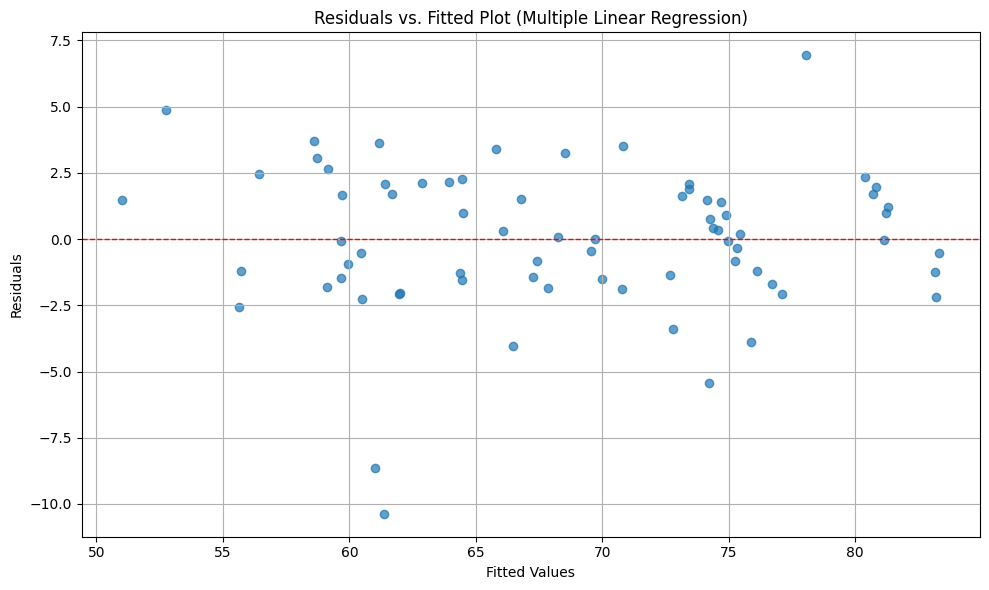

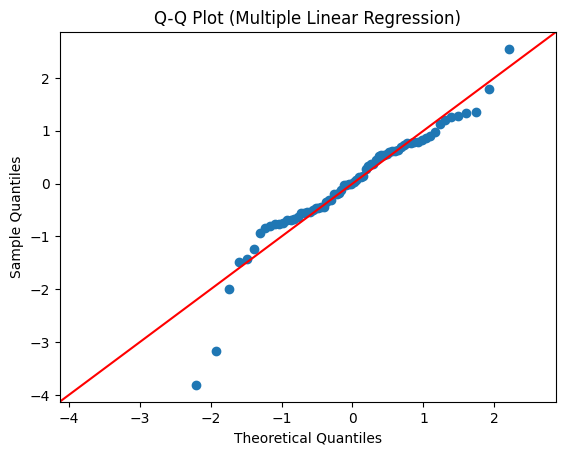

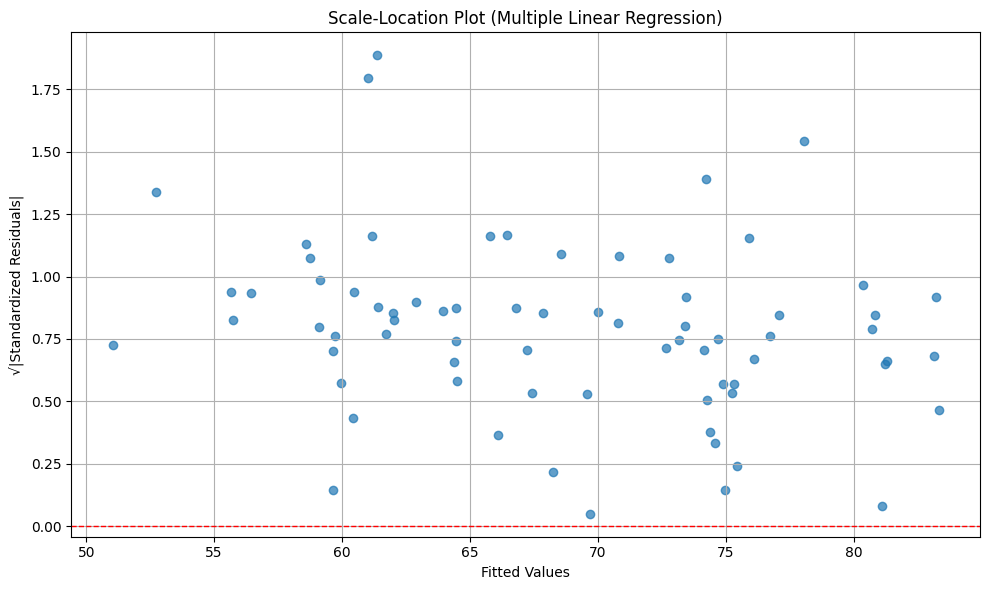

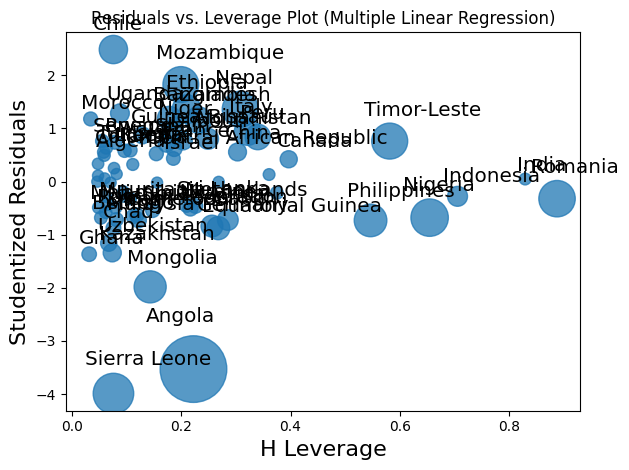

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     40.04
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           4.20e-24
Time:                        21:50:20   Log-Likelihood:                -174.25
No. Observations:                  72   AIC:                             376.5
Df Residuals:                      58   BIC:                             408.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [264]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

# Predictor Variables
Variables = ['Hepatitis B', 'Measles ', 'under-five deaths ', 'Polio', 'Diphtheria ', 
             ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', 
             ' thinness 5-9 years', 'Income composition of resources', 'Schooling', 
             'Is_Developed']

# Dropping rows with missing data in the selected columns, including the dependent variable
mlr_data = data_cleaned[Variables + ['Life expectancy ']].dropna(subset=Variables + ['Life expectancy '])

# Adding a constant for the regression model
mlr_data['const'] = 1

# Fit the multiple linear regression model
mlr_model = sm.OLS(mlr_data['Life expectancy '], mlr_data[['const'] + Variables]).fit()

# Summary of the regression
mlr_summary = mlr_model.summary()

# Residual diagnostics for the multiple linear regression model

# Residuals vs. Fitted Plot
plt.figure(figsize=(10, 6))
plt.scatter(mlr_model.fittedvalues, mlr_model.resid, alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Residuals vs. Fitted Plot (Multiple Linear Regression)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.tight_layout()
plt.show()

# Q-Q Plot
fig = sm.qqplot(mlr_model.resid, line='45', fit=True)
plt.title("Q-Q Plot (Multiple Linear Regression)")
plt.show()

# Scale-Location Plot
standardized_residuals_mlr = mlr_model.get_influence().resid_studentized_internal
plt.figure(figsize=(10, 6))
plt.scatter(mlr_model.fittedvalues, np.sqrt(np.abs(standardized_residuals_mlr)), alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Scale-Location Plot (Multiple Linear Regression)')
plt.xlabel('Fitted Values')
plt.ylabel('√|Standardized Residuals|')
plt.grid(True)
plt.tight_layout()
plt.show()

# Residuals vs. Leverage Plot
sm.graphics.influence_plot(mlr_model, criterion="cooks", alpha=0.7)
plt.title("Residuals vs. Leverage Plot (Multiple Linear Regression)")
plt.tight_layout()
plt.show()

# Display the regression summary
print(mlr_summary)

In [265]:
# Report on p-values of the variables
p_values = mlr_model.pvalues.drop('const')
significant_vars = p_values[p_values < 0.05].index
insignificant_vars = p_values[p_values >= 0.05].index

# Display the significant variables
print("Significant Variables:")
print(significant_vars)

# Display the insignificant variables
print("\nInsignificant Variables:")
print(insignificant_vars)

# Display the p-values of the significant variables
print("\nP-Values of Significant Variables:")
print(p_values[significant_vars])

# Display the p-values of the insignificant variables
print("\nP-Values of Insignificant Variables:")
print(p_values[insignificant_vars])


Significant Variables:
Index([' HIV/AIDS', 'Income composition of resources'], dtype='object')

Insignificant Variables:
Index(['Hepatitis B', 'Measles ', 'under-five deaths ', 'Polio', 'Diphtheria ',
       'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years',
       'Schooling', 'Is_Developed'],
      dtype='object')

P-Values of Significant Variables:
 HIV/AIDS                          2.941047e-05
Income composition of resources    1.486663e-08
dtype: float64

P-Values of Insignificant Variables:
Hepatitis B              0.456476
Measles                  0.508497
under-five deaths        0.314471
Polio                    0.450965
Diphtheria               0.555558
GDP                      0.418145
Population               0.897048
 thinness  1-19 years    0.452290
 thinness 5-9 years      0.604462
Schooling                0.337719
Is_Developed             0.424460
dtype: float64


Based on the significant variables here and insignificant, I am going to keep the HIV/AIDS, Income composition of resources, and under-five deaths since they have the lowest p-values. 

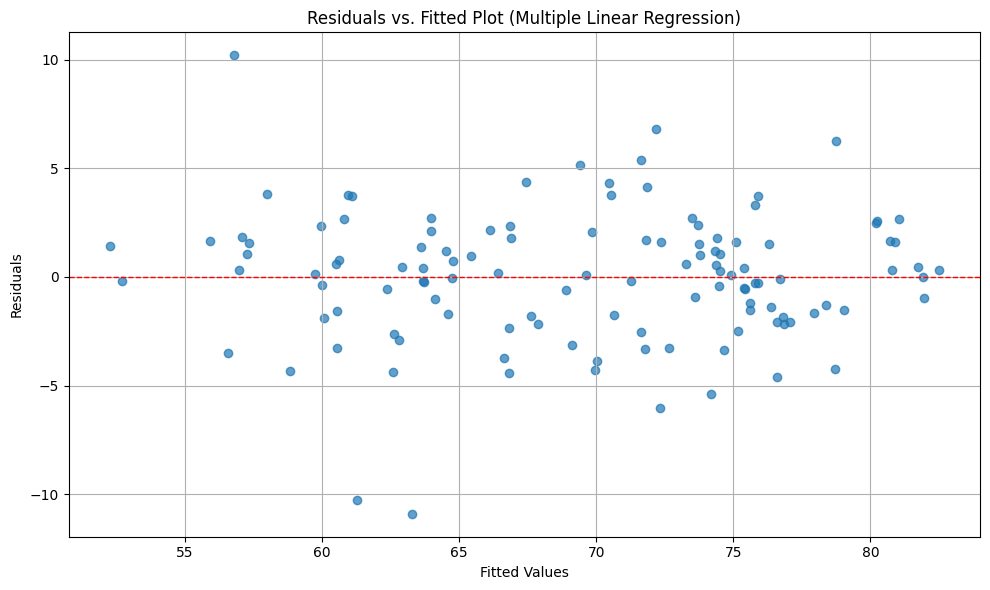

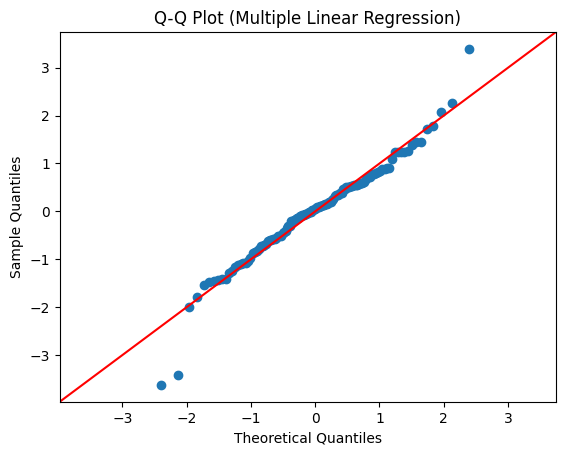

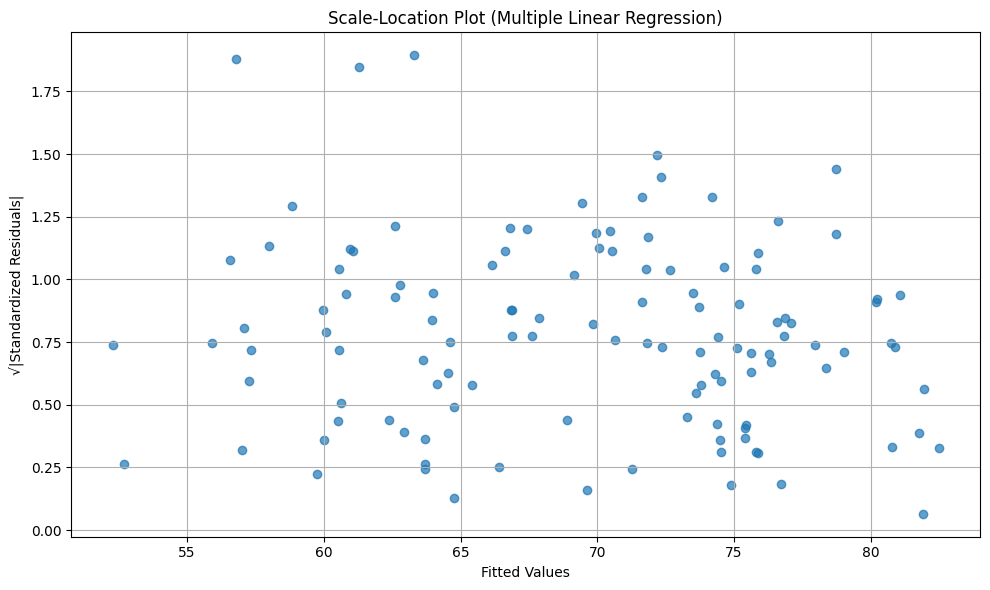

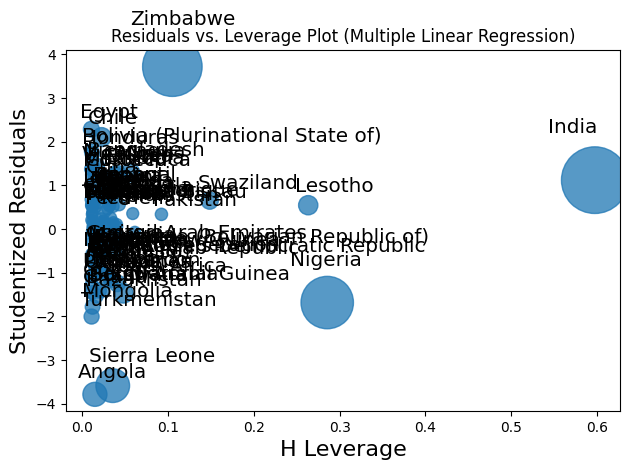

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     234.5
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           4.52e-49
Time:                        22:08:21   Log-Likelihood:                -302.42
No. Observations:                 120   AIC:                             612.8
Df Residuals:                     116   BIC:                             624.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [290]:
# Predictor variables
Variables = ['under-five deaths ', ' HIV/AIDS', 'Income composition of resources']

# Dropping rows with missing data in the selected columns, including the dependent variable
mlr_data = data_cleaned[Variables + ['Life expectancy ']].dropna(subset=Variables + ['Life expectancy '])

# Adding a constant for the regression model
mlr_data['const'] = 1

# Fit the multiple linear regression model
mlr_model = sm.OLS(mlr_data['Life expectancy '], mlr_data[['const'] + Variables]).fit()

# Summary of the regression
mlr_summary = mlr_model.summary()

# Residual diagnostics for the multiple linear regression model

# Residuals vs. Fitted Plot
plt.figure(figsize=(10, 6))
plt.scatter(mlr_model.fittedvalues, mlr_model.resid, alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Residuals vs. Fitted Plot (Multiple Linear Regression)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.tight_layout()
plt.show()

# Q-Q Plot
fig = sm.qqplot(mlr_model.resid, line='45', fit=True)
plt.title("Q-Q Plot (Multiple Linear Regression)")
plt.show()

# Scale-Location Plot
standardized_residuals_mlr = mlr_model.get_influence().resid_studentized_internal
plt.figure(figsize=(10, 6))
plt.scatter(mlr_model.fittedvalues, np.sqrt(np.abs(standardized_residuals_mlr)), alpha=0.7)
plt.title('Scale-Location Plot (Multiple Linear Regression)')
plt.xlabel('Fitted Values')
plt.ylabel('√|Standardized Residuals|')
plt.grid(True)
plt.tight_layout()
plt.show()

# Residuals vs. Leverage Plot
sm.graphics.influence_plot(mlr_model, criterion="cooks", alpha=0.7)
plt.title("Residuals vs. Leverage Plot (Multiple Linear Regression)")
plt.tight_layout()
plt.show()

# Display the regression summary
print(mlr_summary)

This showcases the best significant results with high accuracy. Now assess the multicolinearity of these variables to ensure they are definitely not multicolinear.

In [268]:
# Assessing multicollinearity of the independent variables
# Importing packages for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add a constant column to the dataset for VIF calculation
X = add_constant(mlr_data.drop(columns=['Life expectancy ']))

# Compute VIF for each feature
vif_data = pd.DataFrame({"Feature": X.columns, 
                         "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]})

print(vif_data)


                           Feature        VIF
0               under-five deaths    1.036237
1                         HIV/AIDS   1.263456
2  Income composition of resources   1.302598
3                            const  29.049769


These variables appear to not be multicolinear except the constant, which we won't worry about. So, let's use this model for the final analysis due to its high predictiveness, significant predictors, and low multicolinearity. Let's Showcase the test of the plot values vs. actual.

Our model is Life Expectancy = 44.4743 - 0.0028(under-five deaths) - 1.3264(HIV/AIDS) + 40.7082(Income Composition of Resources)

In [269]:
# Reload dataset again:
data = pd.read_csv('/Users/jonahzembower/Library/CloudStorage/OneDrive-SetonHillUniversity/Semester Classwork/Fall 2024 Semester SHU/Probability and Statistics II/Projects/2015_data.csv')

In [270]:
# Define the regression equation coefficients
intercept = 44.4743
coeff_under_five_deaths = -0.0028
coeff_hiv_aids = -1.3264
coeff_income_resources = 40.7082

# Calculate the predicted life expectancy
data['Predicted_Life_Expectancy'] = (
    intercept +
    coeff_under_five_deaths * data['under-five deaths '] +
    coeff_hiv_aids * data[' HIV/AIDS'] +
    coeff_income_resources * data['Income composition of resources']
)

# Calculate the residuals
data['Residual'] = data['Life expectancy '] - data['Predicted_Life_Expectancy']

# Create a DataFrame showcasing actual vs. predicted values and residuals
results_df = data[['Country', 'Life expectancy ', 'Predicted_Life_Expectancy', 'Residual']]

# Showcase the results
results_df

,Country,Life expectancy,Predicted_Life_Expectancy,Residual
0,Afghanistan,65.0,63.608488,1.391512
1,Albania,77.8,75.361308,2.438692
2,Algeria,75.6,74.520653,1.079347
3,Angola,52.4,63.295794,-10.895794
4,Antigua and Barbuda,76.4,76.124249,0.275751
...,...,...,...,...
178,Venezuela (Bolivarian Republic of),74.1,75.618266,-1.518266
179,Viet Nam,76.0,71.843820,4.156180
180,Yemen,65.7,64.523452,1.176548
181,Zambia,61.8,62.371983,-0.571983


/var/folders/5v/l60713ps6gz1y72cj6ls8g_w0000gn/T/ipykernel_40128/3898514676.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='Residual', data=subset_residuals, palette="viridis")


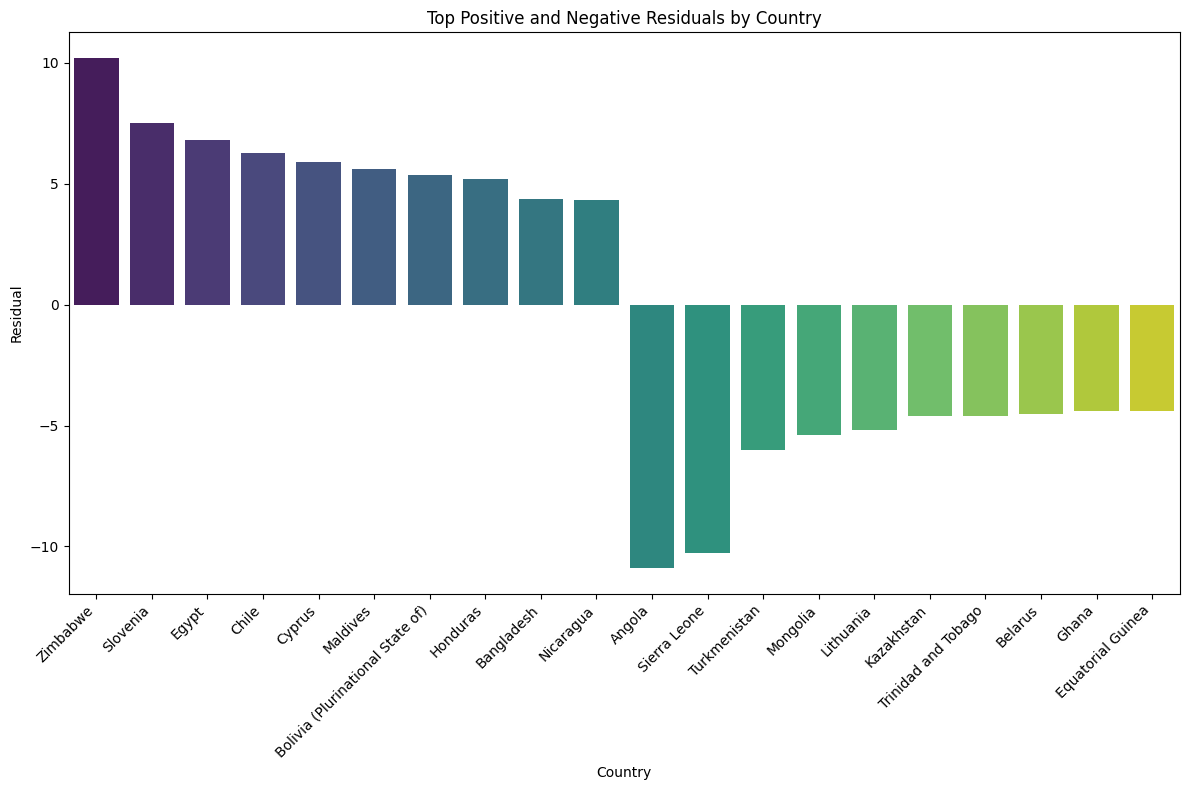

In [271]:
# Select the top 10 countries with the largest positive and negative residuals
top_positive_residuals = results_df.nlargest(10, 'Residual')
top_negative_residuals = results_df.nsmallest(10, 'Residual')

# Combine the subsets
subset_residuals = pd.concat([top_positive_residuals, top_negative_residuals])

# Plot the residuals for the selected countries
plt.figure(figsize=(12, 8))
sns.barplot(x='Country', y='Residual', data=subset_residuals, palette="viridis")
plt.title('Top Positive and Negative Residuals by Country')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This helps us to understand the countries with the least predictability based on the current actual data. We should be careful with performing any strategies to change up the performance of different values that will contribute to life expectancy.

Also, let's look back and try all the variables when we include the entire life expectancy dataset.

In [272]:
# Reset the data for windows
# data = pd.read_csv("C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Semester Classwork\\Fall 2024 Semester SHU\\Probability and Statistics II\\Projects\\Life Expectancy Data.csv")

In [273]:
# Reset the data for mac
data = pd.read_csv('/Users/jonahzembower/Library/CloudStorage/OneDrive-SetonHillUniversity/Semester Classwork/Fall 2024 Semester SHU/Probability and Statistics II/Projects/Life Expectancy Data.csv')

In [274]:
from statsmodels.api import OLS, add_constant
# Step 1: Select columns for multiple regression
columns = ['Hepatitis B', 'Measles ','under-five deaths ', 'Polio', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling', 'Life expectancy ']
data_selected = data[columns].dropna()

# Dependent variable (y) and independent variables (X)
y = data_selected['Life expectancy ']
X = data_selected[['Hepatitis B', 'Measles ','under-five deaths ', 'Polio', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']]

# Step 2: Add a constant for OLS regression
X_const = add_constant(X)

# Fit the model using statsmodels
model = OLS(y, X_const).fit()

# Display model summary
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Life expectancy    R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     521.2
Date:                Wed, 11 Dec 2024   Prob (F-statistic):               0.00
Time:                        21:50:22   Log-Likelihood:                -5029.8
No. Observations:                1777   AIC:                         1.009e+04
Df Residuals:                    1764   BIC:                         1.016e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              47.7268      0.665     71.767      0.000      46.422      49.031
Hepatitis B                        -0.0066      0.005     -1.319      0.187      -0.016       0.003
Measles                          1.967e-05   1.16e-05      1.697      0.090   -3.06e-06    4.24e-05
under-five deaths                  -0.0030      0.001     -2.997      0.003      -0.005      -0.001
Polio                               0.0162      0.006      2.886      0.004       0.005       0.027
Diphtheria                          0.0186      0.007      2.831      0.005       0.006       0.031
 HIV/AIDS                          -0.6249      0.017    -35.839      0.000      -0.659      -0.591
GDP                              6.894e-05    9.9e-06      6.962      0.000    4.95e-05    8.84e-05
Population                       3.467e-09    1.9e-09      1.822      0.069   -2.65e-10     7.2e-09
 thinness  1-19 years               0.0122      0.060      0.204      0.838      -0.105       0.129
 thinness 5-9 years                -0.1190      0.058     -2.050      0.041      -0.233      -0.005
Income composition of resources    13.0911      0.920     14.227      0.000      11.286      14.896
Schooling                           1.0144      0.061     16.496      0.000       0.894       1.135
==============================================================================
Omnibus:                       22.936   Durbin-Watson:                   0.406
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.973
Skew:                          -0.123   Prob(JB):                     4.20e-08
Kurtosis:                       3.631   Cond. No.                     6.62e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.62e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This model doesn't perform as accurately but there are more accurate variables to work with in reference to predicting life expectancy. This is most likely due to the fact that there is more data to work with. 

In [275]:
columns = ['Measles ','under-five deaths ', 'Polio', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness 5-9 years', 'Income composition of resources', 'Schooling', 'Life expectancy ']
data_selected = data[columns].dropna()

# Dependent variable (y) and independent variables (X)
y = data_selected['Life expectancy ']
X = data_selected[['Measles ','under-five deaths ', 'Polio', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']]

# Step 2: Add a constant for OLS regression
X_const = add_constant(X)

# Fit the model using statsmodels
model = OLS(y, X_const).fit()

# Display model summary
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Life expectancy    R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     948.7
Date:                Wed, 11 Dec 2024   Prob (F-statistic):               0.00
Time:                        21:50:22   Log-Likelihood:                -6405.9
No. Observations:                2230   AIC:                         1.283e+04
Df Residuals:                    2219   BIC:                         1.290e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              45.5986      0.525     86.811      0.000      44.569      46.629
Measles                         -1.716e-06   9.19e-06     -0.187      0.852   -1.97e-05    1.63e-05
under-five deaths                  -0.0008      0.001     -1.041      0.298      -0.002       0.001
Polio                               0.0220      0.005      4.143      0.000       0.012       0.032
Diphtheria                          0.0249      0.005      4.622      0.000       0.014       0.035
 HIV/AIDS                          -0.6489      0.017    -38.891      0.000      -0.682      -0.616
GDP                              5.333e-05   7.78e-06      6.853      0.000    3.81e-05    6.86e-05
Population                       1.708e-09   1.77e-09      0.966      0.334   -1.76e-09    5.18e-09
 thinness 5-9 years                -0.1021      0.025     -4.082      0.000      -0.151      -0.053
Income composition of resources    11.7835      0.807     14.608      0.000      10.202      13.365
Schooling                           1.1295      0.053     21.514      0.000       1.027       1.232
==============================================================================
Omnibus:                      115.504   Durbin-Watson:                   0.438
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              360.965
Skew:                          -0.187   Prob(JB):                     4.14e-79
Kurtosis:                       4.935   Cond. No.                     5.61e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.61e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The model appears to perform more accurately. There are interesting things to look at from this data.

In [276]:
columns = ['Polio', 'Diphtheria ', ' HIV/AIDS', 'GDP', ' thinness 5-9 years', 'Income composition of resources', 'Schooling', 'Life expectancy ']
data_selected = data[columns].dropna()

# Dependent variable (y) and independent variables (X)
y = data_selected['Life expectancy ']
X = data_selected[['Polio', 'Diphtheria ', ' HIV/AIDS', 'GDP', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']]

# Step 2: Add a constant for OLS regression
X_const = add_constant(X)

# Fit the model using statsmodels
model = OLS(y, X_const).fit()

# Display model summary
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Life expectancy    R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     1386.
Date:                Wed, 11 Dec 2024   Prob (F-statistic):               0.00
Time:                        21:50:22   Log-Likelihood:                -7062.5
No. Observations:                2450   AIC:                         1.414e+04
Df Residuals:                    2442   BIC:                         1.419e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              46.7291      0.510     91.714      0.000      45.730      47.728
Polio                               0.0278      0.005      5.298      0.000       0.017       0.038
Diphtheria                          0.0312      0.005      5.954      0.000       0.021       0.041
 HIV/AIDS                          -0.6632      0.017    -39.716      0.000      -0.696      -0.630
GDP                              6.132e-05   6.98e-06      8.782      0.000    4.76e-05     7.5e-05
 thinness 5-9 years                -0.1487      0.022     -6.778      0.000      -0.192      -0.106
Income composition of resources    10.1603      0.713     14.245      0.000       8.762      11.559
Schooling                           1.0629      0.047     22.596      0.000       0.971       1.155
==============================================================================
Omnibus:                      177.866   Durbin-Watson:                   0.445
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              913.760
Skew:                           0.043   Prob(JB):                    3.80e-199
Kurtosis:                       5.991   Cond. No.                     1.33e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [277]:
# viewing how many instances we used from the dataset
data_selected.shape

(2450, 8)

This has a lot more instances and the predictors above seemed to work pretty accurately with an R^2 value of about 0.8. This also is in conjunction with statistically significant predictors that appear to affect the response variable of life expectancy. Now, we did this with many different instances looking outside of just one year. This helped the model tremendously. 

Both ways of doing the multiple linear regression is appropriate. It helps that we looked at both trying to predict a single year's life expectancy or just looking at all of it. The single year had high predictability but also less data. It gave fewer variables that could be used in the prediction process effectively. However, the longer term data was smaller in R^2 values but it appeared to improve in its ability to use multiple predictors effectively when looking at life expectancy across multiple time periods. 

Effective predictors in 2015: under-five deaths, HIV/AIDS, Income composition of resources

Effective predictors for long-term data: Polio, Diphtheria, HIV/AIDS, GDP, thiness 5-9 years, Income Composition of Resources, Schooling

These predictors are subjective and could come differently based on the analysis techniques used in data cleaning methods, but this is what was found for the data through my analysis. Based on the statistically significant p-values, we can conclude that the effective predictors listed above do effectively work at predicting the life expectancy of a given country based on the data provided. 

# ANOVA

First let's add the countries into their respective continents.

In [278]:
# dictionary of continents versus countries
continent_countries = {
    "Africa": [
        "Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", 
        "Cabo Verde", "Cameroon", "Central African Republic", "Chad", "Comoros", 
        "Congo", "Djibouti", "Egypt", "Equatorial Guinea", "Eritrea", "Eswatini", 
        "Ethiopia", "Gabon", "Gambia", "Ghana", "Guinea", "Guinea-Bissau", 
        "Ivory Coast", "Kenya", "Lesotho", "Liberia", "Libya", "Madagascar", 
        "Malawi", "Mali", "Mauritania", "Mauritius", "Mozambique", "Namibia", 
        "Niger", "Nigeria", "Rwanda", "Sao Tome and Principe", "Senegal", 
        "Seychelles", "Sierra Leone", "Somalia", "South Africa", "South Sudan", 
        "Sudan", "Tanzania", "Togo", "Tunisia", "Uganda", "Zambia", "Zimbabwe",'United Republic of Tanzania',
        'Swaziland','Morocco','Democratic Republic of the Congo',"Côte d'Ivoire",
    ],
    "Asia": [
        "Afghanistan", "Armenia", "Azerbaijan", "Bahrain", "Bangladesh", 
        "Bhutan", "Brunei Darussalam", "Cambodia", "China", "Georgia", 
        "India", "Indonesia", "Iran (Islamic Republic of)", "Iraq", "Israel", 
        "Japan", "Jordan", "Kazakhstan", "Kuwait", "Kyrgyzstan", "Lao People's Democratic Republic", 
        "Lebanon", "Malaysia", "Maldives", "Mongolia", "Myanmar", "Nepal", 
        "Oman", "Pakistan", "Philippines", "Qatar", "Republic of Korea", 
        "Saudi Arabia", "Singapore", "Sri Lanka", "Syrian Arab Republic", 
        "Tajikistan", "Thailand", "Timor-Leste", "Turkey", "Turkmenistan", 
        "United Arab Emirates", "Uzbekistan", "Viet Nam", "Yemen","Democratic People's Republic of Korea",
    ],
    "Europe": [
        "Albania", "Andorra", "Armenia", "Austria", "Belarus", "Belgium", 
        "Bosnia and Herzegovina", "Bulgaria", "Croatia", "Cyprus", "Czechia", 
        "Denmark", "Estonia", "Finland", "France", "Georgia", "Germany", 
        "Greece", "Hungary", "Iceland", "Ireland", "Italy", "Latvia", 
        "Lithuania", "Luxembourg", "Malta", "Moldova", "Monaco", "Montenegro", 
        "Netherlands", "North Macedonia", "Norway", "Poland", "Portugal", 
        "Romania", "Russian Federation", "San Marino", "Serbia", "Slovakia", 
        "Slovenia", "Spain", "Sweden", "Switzerland", "Ukraine", "United Kingdom", 
        "Vatican City",'United Kingdom of Great Britain and Northern Ireland','The former Yugoslav republic of Macedonia',
        'Republic of Moldova'
    ],
    "North America": [
        "Antigua and Barbuda", "Bahamas", "Barbados", "Belize", "Canada", 
        "Costa Rica", "Cuba", "Dominica", "Dominican Republic", "El Salvador", 
        "Grenada", "Guatemala", "Haiti", "Honduras", "Jamaica", "Mexico", 
        "Nicaragua", "Panama", "Saint Kitts and Nevis", "Saint Lucia", 
        "Saint Vincent and the Grenadines", "Trinidad and Tobago", 
        "United States of America"
    ],
    "Oceania": [
        "Australia", "Fiji", "Kiribati", "Marshall Islands", "Micronesia", 
        "Nauru", "New Zealand", "Palau", "Papua New Guinea", "Samoa", 
        "Solomon Islands", "Tonga", "Tuvalu", "Vanuatu", 'Micronesia (Federated States of)'
    ],
    "South America": [
        "Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador", 
        "Guyana", "Paraguay", "Peru", "Suriname", "Uruguay", 
        "Venezuela (Bolivarian Republic of)",'Bolivia (Plurinational State of)',
    ]
}

In [279]:
# do a reverse mapping
country_to_continent = {country: continent 
                        for continent, countries in continent_countries.items() 
                        for country in countries}

# Now map the continent to each country in your DataFrame
data_cleaned['Continent'] = data_cleaned.index.map(country_to_continent)

In [280]:
data_cleaned

,Life expectancy,Hepatitis B,Measles,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Is_Developed,Continent
Country,,,,,,,,,,,,,,,
Afghanistan,65.0,65.0,1154.0,83.0,6.0,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,Asia
Albania,77.8,99.0,NaN,NaN,99.0,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,0,Europe
Algeria,75.6,95.0,63.0,24.0,95.0,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,0,Africa
Angola,52.4,64.0,118.0,98.0,7.0,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,0,Africa
Antigua and Barbuda,76.4,99.0,NaN,NaN,86.0,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9,0,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),74.1,87.0,NaN,10.0,87.0,87.0,0.1,NaN,NaN,1.6,1.5,0.769,14.3,0,South America
Viet Nam,76.0,97.0,256.0,35.0,97.0,97.0,0.1,NaN,NaN,14.2,14.5,0.678,12.6,0,Asia
Yemen,65.7,69.0,468.0,47.0,63.0,69.0,0.1,NaN,NaN,13.6,13.4,0.499,9.0,0,Asia


First, we are going to look at the 2015 data for an ANOVA, then we are going to move onto the whole dataset based on the continent values.

In [281]:
from statsmodels.formula.api import ols
# Perform ANOVA analysis: Dependent variable = 'Life expectancy ', Categorical Independent variable = 'Continent'
# Ensure relevant columns exist in the dataset
anova_data = data_cleaned[['Life expectancy ', 'Continent']].dropna()

# Fit an OLS model and perform ANOVA
# Q stands for quantitative variable, C stands for categorical variable
model = ols('Q("Life expectancy ") ~ C(Continent)', data=anova_data).fit()
anova_results = sm.stats.anova_lm(model, typ=2)

anova_results

,sum_sq,df,F,PR(>F)
C(Continent),7066.209785,5.0,50.58717,2.263679e-32
Residual,4944.807701,177.0,NaN,NaN


1. Continent
    - sum_sq: 7066.21 represents the variability in the dependent variable (e.g., Life Expectancy) explained by the grouping variable (Continent).
    - df: 5, the degrees of freedom, equals the number of groups (continents) minus 1.
    - F: 50.59 is the F-statistic, indicating how much larger the variance between the groups (continents) is compared to the variance within the groups.
    - PR(>F): 2.26×10^−32 is the p-value, which is extremely small, suggesting that the effect of the "Continent" variable is statistically significant.
2. Residual
    - sum_sq: 4944.81 is the variability not explained by the grouping variable (Continent).
    - df: 177, the degrees of freedom for the residuals, equals the total sample size minus the number of groups.
3. This showcases that the 2015 data is clearly statistically significant in its difference from the life expectancy of each of the continents.

/var/folders/5v/l60713ps6gz1y72cj6ls8g_w0000gn/T/ipykernel_40128/3580328625.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Continent', y='Life expectancy ', data=anova_data, ci=None)


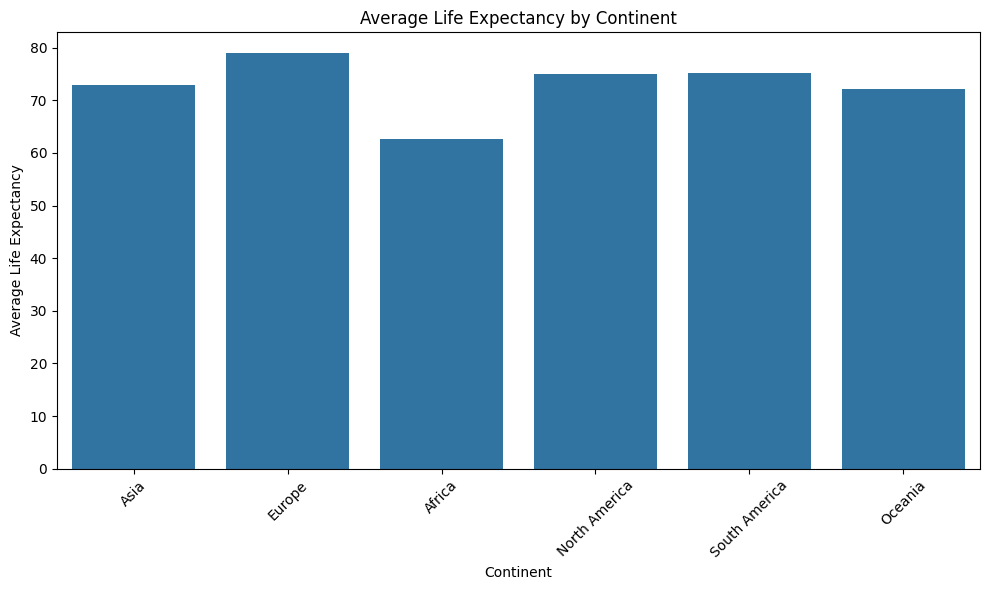

Continent
Africa           62.666667
Asia             72.852273
Europe           78.971429
North America    75.014286
Oceania          72.160000
South America    75.225000
Name: Life expectancy , dtype: float64

In [282]:
# Plot the average life expectancy for each continent
plt.figure(figsize=(10, 6))
sns.barplot(x='Continent', y='Life expectancy ', data=anova_data, ci=None)
plt.title('Average Life Expectancy by Continent')
plt.ylabel('Average Life Expectancy')
plt.xlabel('Continent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Output the exact average life expectancy for each continent
anova_data.groupby('Continent')['Life expectancy '].mean()



This plot showcases the difference in the averages isn't too drastic, but it is enough to showcase that it is statistically significant in the difference of life expectancy from continent to continent. We could look at the larger dataset again, but I believe it is unnecessary due to how statistically significant the p-value was for the ANOVA.

# Non-Parametric Test
1. Mann-Whitney U Test
    - Purpose:
        - Compare the medians of two independent groups.
        - Determine whether one group tends to have larger values than the other.
    - When to Use:
        - Data are not normally distributed.
        - The dependent variable is ordinal or continuous but does not meet parametric test assumptions.
    - Example: Comparing patient satisfaction scores (ordinal scale) between two treatment groups.
2. Kruskal-Wallis Test
    - Purpose:
        - Compare the medians of three or more independent groups.
        - Test whether there is a significant difference between the groups' distributions.
    - When to Use:
        - Data are not normally distributed or are ordinal.
        - There are more than two groups to compare.
    - Example: Testing whether median life expectancy differs significantly across continents.
3. Chi-Squared Test for Independence
    - Purpose:
        - Assess the relationship between two categorical variables.
        - Determine whether the observed frequencies differ significantly from the expected frequencies under independence.
    - When to Use:
        - Both variables are categorical.
        - To test for independence or association.
    - Example: Testing whether the prevalence of a disease is independent of geographic region.

First look at Kruskal-Wallis Test:

In [283]:
# import necessary packages
from scipy.stats import kruskal

# Perform Kruskal-Wallis test using the mapped continent information
continent_data = data_cleaned[['Life expectancy ', 'Continent']].dropna()

# Group data by continent for the Kruskal-Wallis test
groups = [group['Life expectancy '].values for name, group in continent_data.groupby('Continent')]

# Perform the Kruskal-Wallis H-test
kruskal_results = kruskal(*groups)
kruskal_results

# Showcase the results of the Kruskal-Wallis test in dataframe
kruskal_results_df = pd.DataFrame({'H-Statistic': [kruskal_results.statistic], 'p-value': [kruskal_results.pvalue]})
kruskal_results_df

,H-Statistic,p-value
0,101.46353,2.597375e-20


This once again showcases a statistically significat difference across all the different continents. Now, look at the Mann-Whitney U test.

In [284]:
# Perform pairwise comparisons using the Mann-Whitney U test
from itertools import combinations
from scipy.stats import mannwhitneyu

# Perform pairwise comparisons using the Mann-Whitney U test
pairwise_comparisons = []
for group1, group2 in combinations(continent_data['Continent'].unique(), 2):
    group1_data = continent_data[continent_data['Continent'] == group1]['Life expectancy ']
    group2_data = continent_data[continent_data['Continent'] == group2]['Life expectancy ']
    mwu_results = mannwhitneyu(group1_data, group2_data)
    pairwise_comparisons.append((group1, group2, mwu_results.pvalue))

# Display the results of the pairwise comparisons
pairwise_comparisons

# Showcase the results of the pairwise comparisons in a dataframe
pairwise_comparisons_df = pd.DataFrame(pairwise_comparisons, columns=['Continent 1', 'Continent 2', 'p-value'])
pairwise_comparisons_df

,Continent 1,Continent 2,p-value
0,Asia,Europe,1.308203e-06
1,Asia,Africa,2.411076e-11
2,Asia,North America,8.070586e-02
3,Asia,South America,1.621046e-01
4,Asia,Oceania,6.479647e-01
5,Europe,Africa,2.345740e-15
6,Europe,North America,1.237563e-03
7,Europe,South America,1.365551e-02
8,Europe,Oceania,1.718215e-03
9,Africa,North America,1.157660e-08


Once again showcases a statistically significant difference across each continent basically with only a couple that weren't. This is probably the most important test we can do for this data because we are able to compare each continent individually in their relationships to the life expectancy. Now look at the Chi-squared test for indepdence.

In [285]:
# Chi-Square Test of Independence
from scipy.stats import chi2_contingency

# Perform Chi-Square Test of Independence
# Create a contingency table
continent_status_table = pd.crosstab(data_cleaned['Continent'], data_cleaned['Is_Developed'])

# Perform the Chi-Square Test of Independence
chi2_results = chi2_contingency(continent_status_table)
chi2_results

# Showcase the results of the Chi-Square Test of Independence in a dataframe
chi2_results_df = pd.DataFrame({'Chi-Square Statistic': [chi2_results[0]], 'p-value': [chi2_results[1]]})
chi2_results_df

,Chi-Square Statistic,p-value
0,85.247543,6.679822e-17


This showcases the relationship between the two categorical variables of whether a country is developed or what continent they are from. There appears to be a difference between these two compared groups interestingly.

In [286]:
# Showcase the contingency table
continent_status_table

# Showcase the expected frequencies
pd.DataFrame(chi2_results[3], index=continent_status_table.index, columns=continent_status_table.columns)


Is_Developed,0,1
Continent,,
Africa,44.557377,9.442623
Asia,36.306011,7.693989
Europe,34.655738,7.344262
North America,17.327869,3.672131
Oceania,8.251366,1.748634
South America,9.901639,2.098361


Here is the contingency table that shows the frequencies. 

# Summary and Interpretation

- There are a lot of key insights we found from this code. First, we looked at many different ways of displaying the data and cleaning it. It was most important for the data to be available for prediction by removing variables that had high null values. 
- We also focused on certain variables over others due to the nature of the data such as BMI that had very large values for an unapparent reason. 
- We then performed basic data visualization to understand the correlation between the different variables in the dataset.
- Furthermore, we looked at multiple linear regression to understand the relationships between the potential predictor variables and the response variable of life expectancy. We did this for 2015 data and for also the entire dataset.
    - Effective predictors in 2015: under-five deaths, HIV/AIDS, Income composition of resources
    - Effective predictors for long-term data: Polio, Diphtheria, HIV/AIDS, GDP, thiness 5-9 years, Income Composition of Resources, Schooling
- Next, we performed an ANOVA grouping all the countries into continents and then assessing if there was any difference in life expectancy values for the data of each continent. There were thus statistically significant differences.
- Finally, we assessed some non-parametric tecniques to see if this was also showcasing statistical significance. 
    - Kruskal-Wallis Test: Found statistically significant difference across all continents.
    - Mann-Whitney U Test: Found statistically significant differences in most paired continents. 
    - Chi-squared test for indepdence: Found that the continent variable was statistically different from the is developed variable.